# IÐN303G Tæknileg kerfi - Forritunaræfing 5

## Inngangur
Markmiðið með þessari æfingu er að þjálfast í skrifa forrit sem nota yfirfærsluföll við greiningu kerfa.

Hér fyrir neðan eru tekin dæmi um hvernig hægt er að nota control forritasafnið (e. library) til að skilgreina yfirfærsluföll og vinna með þau.

Þið eigið að greina kerfið úr forritunaræfingu 1/prófinu (tankur) með aðstoð yfirfærslufalla. 

Verkefnið er þríþætt:

1. Finna yfirfærslufall fyrir hvern hluta kerfisins.
2. Finna, með aðstoð control forritasafnsins, yfirfærslufall milli útflæðis ($q$) og vatnshæðar ($h$).
3. Teikna tímasvörun og tíðnisvörun yfirfærslufallsins úr 2).

Þið getið borið saman niðurstöðuna ykkar við niðurstöðuna í forritunarverkefni 1 og í prófinu.

Ef tími vinnst til má gera sambærilega greiningu fyrir yfirfærslufallið milli óskgildis ($r$) og vatnshæðar ($h$).

In [ ]:
!pip install control

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [ ]:
# Hér skrifið þið ykkar kóða. Byrjið á að skoða dæmin hér fyrir neðan og notið það sem við á.

# Skilgreina yfirfærsluföll allra hluta kerfisins

# Yfirfærslufall milli útflæðis og vatnshæðar

# Teikna tímasvörun og tíðnisvörun

# Yfirfærslufall milli óskgildis og vatnshæðar

# Teikna tímasvörun og tíðnisvörun

Í control forritasafninu eru föll þar sem hægt er að skilgreina yfirfærsluföll. Til dæmis eru

\begin{equation}
G_1(s)=\frac{3}{4s^2+s+1}
\end{equation}

og

\begin{equation}
G_2(s)=\frac{4.3}{1.6s+1}
\end{equation}

skilgreind á eftirfarandi hátt.

In [6]:
G1=ct.tf([3.],[4.,1.,1.])
G2=ct.tf([4.3],[1.6,1.])
print(G1)
print(G2)


      3
-------------
4 s^2 + s + 1


   4.3
---------
1.6 s + 1



Hægt er að tengja saman yfirfærsluföll, hvort heldur sem þau eru raðtengd, hliðtengd eða tengd með afturvirkni.

Ef föllin eru raðtengd þá eru þau margfölduð saman og ef þau eru hliðtengd má eru þau lögð saman. Það má líka nota
skipanirnar $series$ eða $parallel$. Ef föllin eru tengd saman með afturvirkni er notuð skipunin $feedback$.

In [9]:
print(G1*G2)
print(ct.series(G1,G2))


            12.9
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1


            12.9
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1



In [10]:
print(G1+G2)
print(ct.parallel(G1,G2))


   17.2 s^2 + 9.1 s + 7.3
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1


   17.2 s^2 + 9.1 s + 7.3
-----------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 1



In [18]:
print(ct.feedback(G1,G2))


           4.8 s + 3
--------------------------------
6.4 s^3 + 5.6 s^2 + 2.6 s + 13.9



Á einfaldan hátt má skoða tímasvörun yfirfærslufalls, þ.e. svörun við einingaþrepafalli.

Text(0, 0.5, 'útslag')

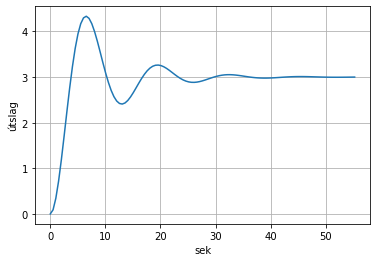

In [61]:
t,y = ct.step_response(G1)
plt.plot(t,y)
plt.grid()
plt.xlabel('sek')
plt.ylabel('útslag')

Einnig má finna tíðnisvörun yfirfærslufalls og birta í svkölluðum Bode ritum sem sýna útslag og fasa sem fall af
horntíðni (rad/sek). Venjan er að hafa útslag og horntíðni á logaritmiskum kvarða. Meira um það síðar.

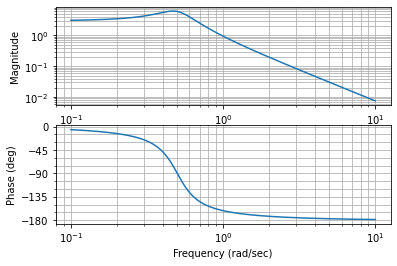

In [95]:
mag,phase,omega=ct.bode(G1)

Það má líka teikna niðurstöðuna á línulegum kvarða og hér er fasinn í einingunni rad.

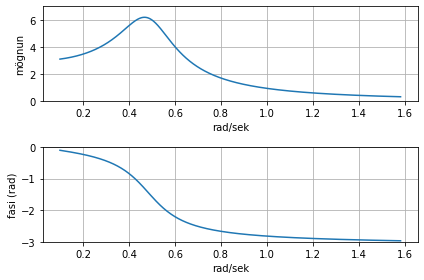

In [96]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(omega[:600],mag[:600])
axs[0].set_ylim(0, 7)
axs[0].set_xlabel('rad/sek')
axs[0].set_ylabel('mögnun')
axs[0].grid(True)

axs[1].plot(omega[:600],phase[:600])
axs[1].set_ylim(-3, 0)
axs[1].set_xlabel('rad/sek')
axs[1].set_ylabel('fasi (rad)')
axs[1].grid(True)

fig.tight_layout()
plt.show()